## Predicting Precipitation in the New York City Area
### DS 3000 - Spring 2023 
### Northeastern University - Khoury College of Computer Sciences
### Authors: Brian Hayward, Jason Martinez, Noah Weinstein, Issac Schweiger
___

## Part 1: Data Processing and Analysis

In [56]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%pip install plotly
import plotly.express as px
sns.set_style('darkgrid')

Note: you may need to restart the kernel to use updated packages.


In [57]:
df = pd.read_csv('Data/Jan2017_to_Feb2023_data.csv', skiprows=3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             2243 non-null   object 
 1   weathercode (wmo code)           2243 non-null   int64  
 2   temperature_2m_max (°F)          2243 non-null   float64
 3   temperature_2m_min (°F)          2243 non-null   float64
 4   temperature_2m_mean (°F)         2243 non-null   float64
 5   apparent_temperature_max (°F)    2243 non-null   float64
 6   apparent_temperature_min (°F)    2243 non-null   float64
 7   apparent_temperature_mean (°F)   2243 non-null   float64
 8   sunrise (iso8601)                2243 non-null   object 
 9   sunset (iso8601)                 2243 non-null   object 
 10  shortwave_radiation_sum (MJ/m²)  2243 non-null   float64
 11  rain_sum (inch)                  2243 non-null   float64
 12  snowfall_sum (inch) 

In [58]:
df.isnull().sum()
# there are no null values, meaning that this dataset probably needs minimal processing

time                               0
weathercode (wmo code)             0
temperature_2m_max (°F)            0
temperature_2m_min (°F)            0
temperature_2m_mean (°F)           0
apparent_temperature_max (°F)      0
apparent_temperature_min (°F)      0
apparent_temperature_mean (°F)     0
sunrise (iso8601)                  0
sunset (iso8601)                   0
shortwave_radiation_sum (MJ/m²)    0
rain_sum (inch)                    0
snowfall_sum (inch)                0
windspeed_10m_max (mp/h)           0
windgusts_10m_max (mp/h)           0
dtype: int64

In [59]:
df.rename(columns={'weathercode (wmo code)': 'weathercode', 
                   'temperature_2m_max (°F)':'max_temperature', 
                   'temperature_2m_min (°F)':'min_temperature',
                   'temperature_2m_mean (°F)':'mean_temperature', 
                   'apparent_temperature_max (°F)':'max_feels_like', 
                   'apparent_temperature_min (°F)':'min_feels_like', 
                   'apparent_temperature_mean (°F)':'mean_feels_like', 
                   'sunrise (iso8601)':'sunrise_time', 
                   'sunset (iso8601)':'sunset_time', 
                   'shortwave_radiation_sum (MJ/m²)':'solar_radiation_sum', 
                   'rain_sum (inch)':'total_rainfall',
                   'snowfall_sum (inch)':'total_snowfall', 
                   'windspeed_10m_max (mp/h)':'max_windspeed', 
                   'windgusts_10m_max (mp/h)':'max_windgusts'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 2243 non-null   object 
 1   weathercode          2243 non-null   int64  
 2   max_temperature      2243 non-null   float64
 3   min_temperature      2243 non-null   float64
 4   mean_temperature     2243 non-null   float64
 5   max_feels_like       2243 non-null   float64
 6   min_feels_like       2243 non-null   float64
 7   mean_feels_like      2243 non-null   float64
 8   sunrise_time         2243 non-null   object 
 9   sunset_time          2243 non-null   object 
 10  solar_radiation_sum  2243 non-null   float64
 11  total_rainfall       2243 non-null   float64
 12  total_snowfall       2243 non-null   float64
 13  max_windspeed        2243 non-null   float64
 14  max_windgusts        2243 non-null   float64
dtypes: float64(11), int64(1), object(3)
me

In [60]:
df['time'] = pd.to_datetime(df['time'])
df['weathercode'] = df['weathercode'].astype('category')
df['sunrise_time'] = pd.to_datetime(df['sunrise_time'])
df['sunset_time'] = pd.to_datetime(df['sunset_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   time                 2243 non-null   datetime64[ns]
 1   weathercode          2243 non-null   category      
 2   max_temperature      2243 non-null   float64       
 3   min_temperature      2243 non-null   float64       
 4   mean_temperature     2243 non-null   float64       
 5   max_feels_like       2243 non-null   float64       
 6   min_feels_like       2243 non-null   float64       
 7   mean_feels_like      2243 non-null   float64       
 8   sunrise_time         2243 non-null   datetime64[ns]
 9   sunset_time          2243 non-null   datetime64[ns]
 10  solar_radiation_sum  2243 non-null   float64       
 11  total_rainfall       2243 non-null   float64       
 12  total_snowfall       2243 non-null   float64       
 13  max_windspeed        2243 non-nul

In [61]:
df.head()

#TODO EXTEND THE EDA WITH MORE DATA

,time,weathercode,max_temperature,min_temperature,mean_temperature,max_feels_like,min_feels_like,mean_feels_like,sunrise_time,sunset_time,solar_radiation_sum,total_rainfall,total_snowfall,max_windspeed,max_windgusts
0,2017-01-01,3,46.6,30.0,39.7,27.2,39.2,34.1,2017-01-01 07:18:00,2017-01-01 16:41:00,9.01,0.000,0.000,11.3,23.7
1,2017-01-02,53,40.3,29.4,35.9,25.3,32.8,29.8,2017-01-02 07:18:00,2017-01-02 16:42:00,1.00,0.136,0.000,9.8,18.3
2,2017-01-03,61,43.0,39.4,41.0,31.6,38.1,34.8,2017-01-03 07:18:00,2017-01-03 16:43:00,0.83,0.379,0.000,13.6,24.8
3,2017-01-04,51,50.3,31.2,41.9,24.9,42.6,36.5,2017-01-04 07:18:00,2017-01-04 16:43:00,4.58,0.012,0.000,14.8,29.8
4,2017-01-05,71,32.7,27.5,29.7,17.0,24.0,21.1,2017-01-05 07:18:00,2017-01-05 16:44:00,6.15,0.000,0.056,12.5,24.8


In [62]:
fig = px.scatter(df,
              x = 'time',
              y = 'max_temperature',
              title = 'Max Temperature Over Time',
              color='max_temperature',
              color_continuous_scale='bluered',
              labels = {
                  'time': 'Time (UTC)', 
                  'max_temperature': 'Max Temperature (°F)'
                  })
fig.update_xaxes(rangeslider_visible=True)

In [63]:
fig = px.scatter(df,
              x = 'time',
              y = 'min_temperature',
              title = 'Minimum Temperature Over Time',
              color='min_temperature',
              color_continuous_scale='bluered',
              labels={
                  'time': 'Time (UTC)', 
                  'min_temperature': 'Minimum Temperature (°F)'}
              )
fig.update_xaxes(rangeslider_visible=True)

In [64]:
fig = px.scatter(df, 
              x='time',
              y='mean_temperature', 
              title='Mean Temperature Over Time',
              color='mean_temperature',
              color_continuous_scale='bluered',
              labels={
                  'time':'Time', 
                  'mean_temperature':'Mean Temperature (°F)'
                  })
fig.update_xaxes(rangeslider_visible=True)

In [65]:
fig = px.scatter(df, 
              x='time', 
              y='solar_radiation_sum', 
              title='Solar Radiation Over Time', 
              color='solar_radiation_sum',
              color_continuous_scale='sunset_r',
              labels={
                  'solar_radiation_sum':'Solar Radiation (MJ/m²)',
                  'time':'Time (UTC)'})
fig.update_xaxes(rangeslider_visible=True)

In [66]:
fig = px.scatter(df,
        x='time',
        y='total_rainfall',
        color='total_rainfall',
        color_continuous_scale='ice_r',
        title='Total Rainfall Over Time',
        labels={
                'total_rainfall':'Total Rainfall (in)', 
                'time':'Time (UTC)'
                })
fig.update_xaxes(rangeslider_visible=True)

In [67]:
fig = px.scatter(df,
              x='max_windspeed',
              y = 'total_rainfall',
              color='total_rainfall',
              )
fig.update_xaxes(rangeslider_visible=True)

## Part 2: Splitting Data into Training and Testing Sets

In [68]:
X   = df[['max_temperature', 
           'min_temperature',
           'mean_temperature', 
           'max_feels_like', 
           'min_feels_like', 
           'mean_feels_like', 
           'solar_radiation_sum', 
           'max_windspeed', 
           'max_windgusts']] #get the input features
y   = df['total_rainfall'] #get the target TODO MAKE IT rainfall WHICH IS EQUIVALENT TO THE SUM OF TOTAL_RAINFALL AND TOTAL_SNOWFALL

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7 #reproduce the results
                                                   )

## Part 3: Building a Random Forest Regressor

In [69]:
rf = RandomForestRegressor(random_state=7)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=7)

In [70]:
#predict the labels for the test set
y_pred   = rf.predict(X_test)

print('The predicted rainfall is: {}'.format(y_pred))

The predicted rainfall is: [5.95000e-03 2.63000e-02 3.21100e-02 2.85600e-02 1.92600e-02 2.28450e-01
 1.97900e-02 1.25280e-01 2.19020e-01 1.01400e-02 2.33580e-01 3.54100e-02
 9.63000e-03 7.86730e-01 1.07840e-01 0.00000e+00 2.37300e-02 4.78900e-02
 0.00000e+00 2.22200e-02 2.22940e-01 1.98600e-01 2.12500e-02 2.63980e-01
 4.90000e-03 3.85630e-01 3.22000e-03 6.21100e-02 8.54600e-02 8.65000e-02
 7.05100e-02 3.11100e-02 1.17180e-01 4.24000e-03 0.00000e+00 1.21600e-02
 9.50300e-02 6.73000e-02 1.30330e-01 2.78520e-01 1.01070e-01 3.05500e-02
 1.80050e-01 1.59100e-02 1.30050e-01 1.22300e-02 1.24600e-02 3.49100e-02
 7.38200e-02 1.73800e-02 2.00000e-04 4.03700e-02 1.05100e-02 1.60830e-01
 6.02390e-01 1.18700e-01 4.07400e-02 3.90190e-01 2.47000e-03 2.08000e-03
 4.10000e-03 2.98400e-02 5.77900e-02 1.93950e-01 1.07600e-02 7.45300e-02
 4.87000e-03 1.25850e-01 1.31900e-02 6.61000e-03 2.73600e-02 1.45000e-02
 3.82000e-03 3.43300e-02 5.55200e-02 2.42000e-03 1.15500e-02 3.77200e-02
 3.63800e-02 4.48000e-03

In [71]:
mse = mean_squared_error(y_test, y_pred)

# Evaluate the Predictions
print('The mse of the model is: {}'.format(mse))

The mse of the model is: 0.041184261850817236


In [72]:
# Train the model
rf = RandomForestRegressor(random_state=7)
rf.fit(X, y)  # Train on the entire dataset


# Create a function to generate new data based on trends
def extrapolate_data(df, start_year, end_year):
    years_to_extrapolate = end_year - start_year
    df_ext = df.copy()
    
    for i in range(1, years_to_extrapolate + 1):
        df_temp = df.copy()
        df_temp['time'] = df_temp['time'] + pd.DateOffset(years=i)
        df_temp['sunrise_time'] = df_temp['sunrise_time'] + pd.DateOffset(years=i)
        df_temp['sunset_time'] = df_temp['sunset_time'] + pd.DateOffset(years=i)
        df_ext = pd.concat([df_ext, df_temp], ignore_index=True)
    
    return df_ext

# Extrapolate data up to 2028
df_2028 = extrapolate_data(df, 2023, 2028)

# Extract input features for the extrapolated data
X_2028 = df_2028[['max_temperature', 
                  'min_temperature',
                  'mean_temperature', 
                  'max_feels_like', 
                  'min_feels_like', 
                  'mean_feels_like', 
                  'solar_radiation_sum',  
                  'max_windspeed', 
                  'max_windgusts']]

# Make predictions for 2023-2028
y_pred_2028 = rf.predict(X_2028)

# Add predictions to the dataframe
df_2028['predicted_rainfall'] = y_pred_2028

# Save the predictions to a CSV file
df_2028.to_csv('Predicted_Weather_2023_to_2028.csv', index=False)

print("Predictions for 2023-2028 have been saved to 'Predicted_Weather_2023_to_2028.csv'")

Predictions for 2023-2028 have been saved to 'Predicted_Weather_2023_to_2028.csv'


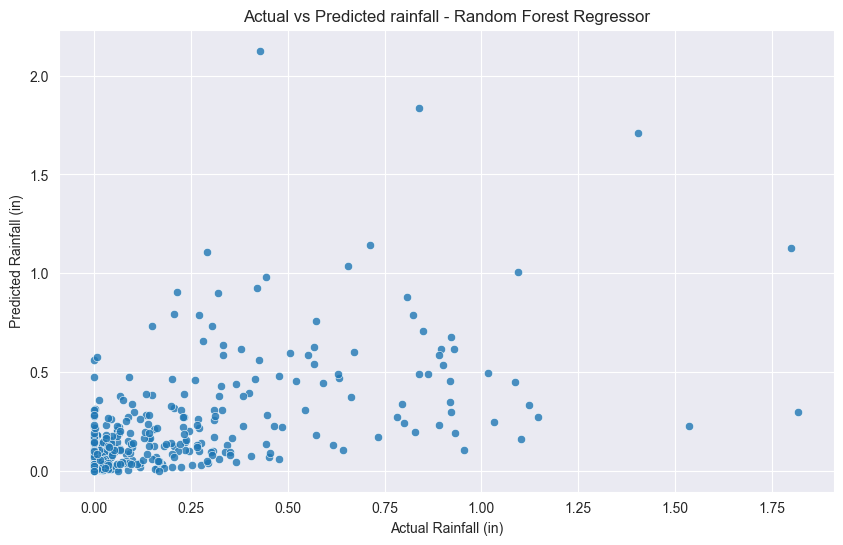

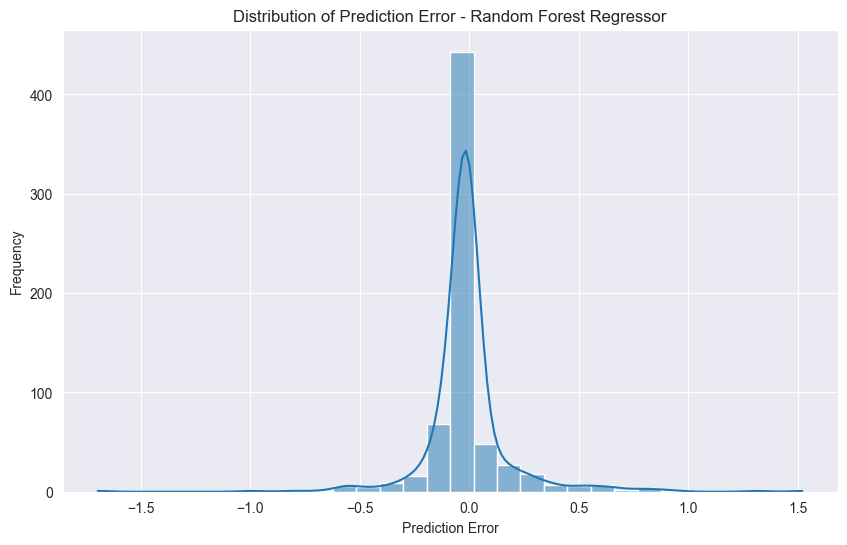

In [73]:
# Plotting the actual vs predicted rainfall using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.8)
plt.xlabel('Actual Rainfall (in)')
plt.ylabel('Predicted Rainfall (in)')
plt.title('Actual vs Predicted rainfall - Random Forest Regressor')
plt.show()

# Plotting the distribution of prediction errors using seaborn
error = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(error, kde=True, bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Error - Random Forest Regressor')
plt.show()

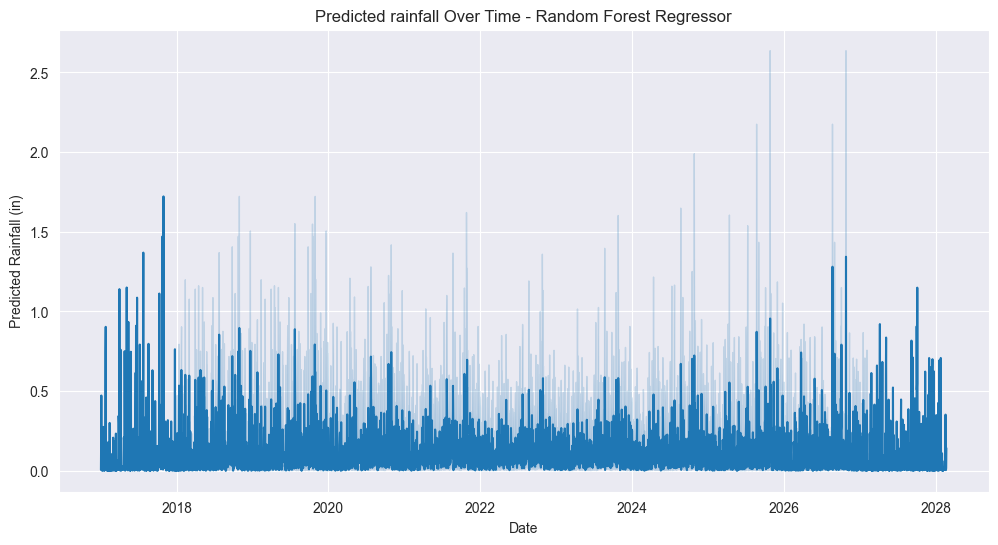

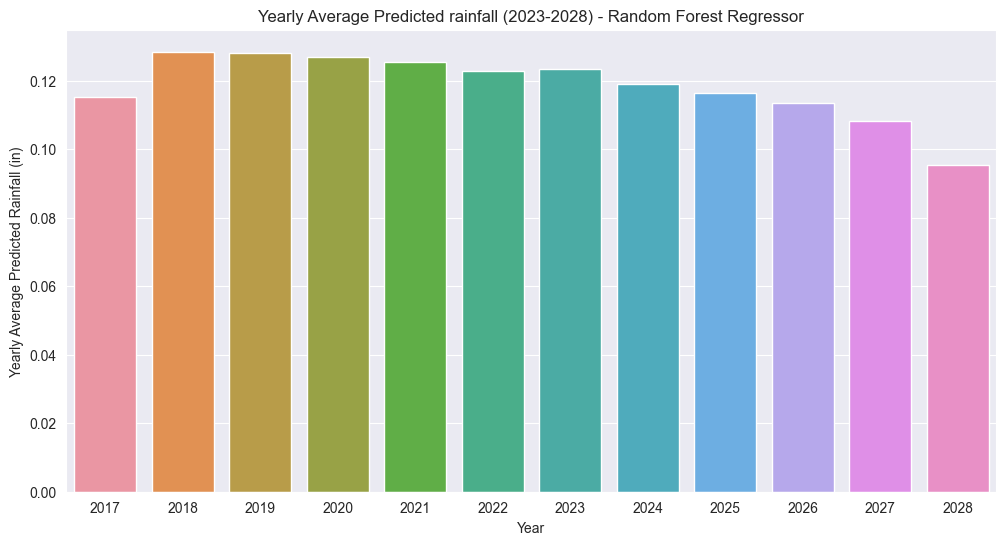

In [74]:
# Convert 'time' to pandas datetime format
df_2028['time'] = pd.to_datetime(df_2028['time'])

# Plot predicted rainfall over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='predicted_rainfall', data=df_2028)
plt.xlabel('Date')
plt.ylabel('Predicted Rainfall (in)')
plt.title('Predicted rainfall Over Time - Random Forest Regressor')
plt.show()

# Calculate yearly average predicted rainfall
df_2028['year'] = df_2028['time'].dt.year
yearly_avg_pred_precip = df_2028.groupby('year')['predicted_rainfall'].mean()

# Plot yearly average predicted rainfall
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_avg_pred_precip.index, y=yearly_avg_pred_precip.values)
plt.xlabel('Year')
plt.ylabel('Yearly Average Predicted Rainfall (in)')
plt.title('Yearly Average Predicted rainfall (2023-2028) - Random Forest Regressor')
plt.show()

In [75]:
# let's find out the most important features

from sklearn.inspection import permutation_importance

feature_labels = [
           'max_temperature', 
           'min_temperature',
           'mean_temperature', 
           'max_feels_like', 
           'min_feels_like', 
           'mean_feels_like', 
           'solar_radiation_sum', 
           'max_windspeed', 
           'max_windgusts']

fig = px.bar(y=rf.feature_importances_, x=feature_labels, color=feature_labels, title='Feature Importances (Random Forest Regressor)')
fig.update_layout(
    xaxis_title="Feature Name",
    yaxis_title="Feature Importance Measure"
)
fig.show()

## Part 4: Building a K-Nearest Neighbors Regressor

In [76]:
k = 5  # Set the number of neighbors you want to consider
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.03752950882615156
R-squared: 0.39879264472010656


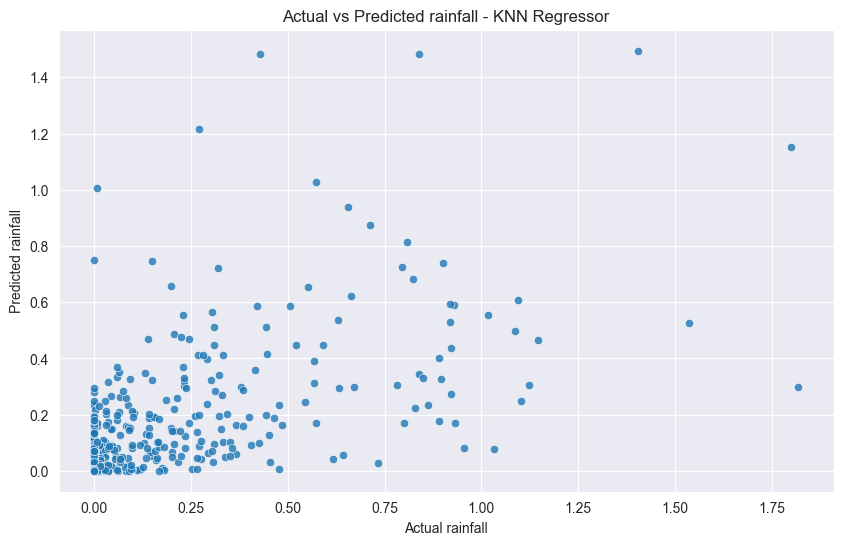

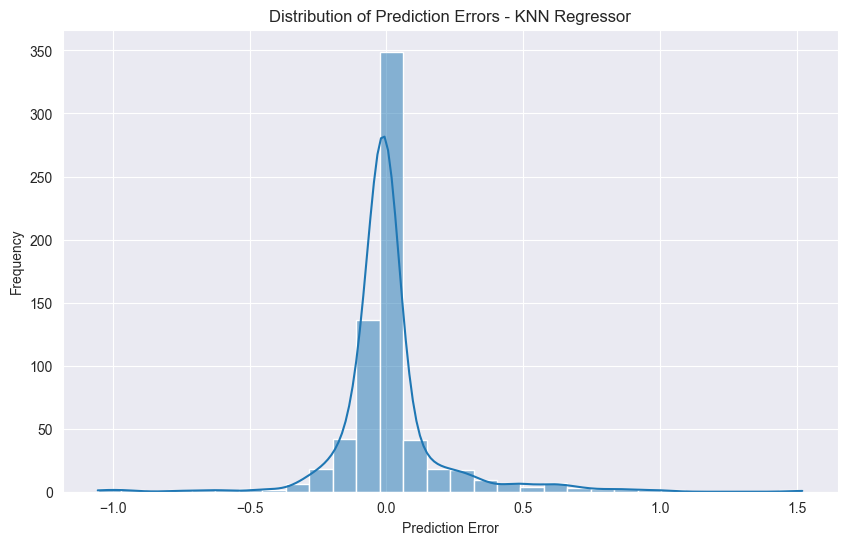

In [77]:
# Plotting the actual vs predicted rainfall using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.8)
plt.xlabel('Actual rainfall')
plt.ylabel('Predicted rainfall')
plt.title('Actual vs Predicted rainfall - KNN Regressor')
plt.show()

# Plotting the distribution of prediction errors using seaborn
error = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(error, kde=True, bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors - KNN Regressor')
plt.show()

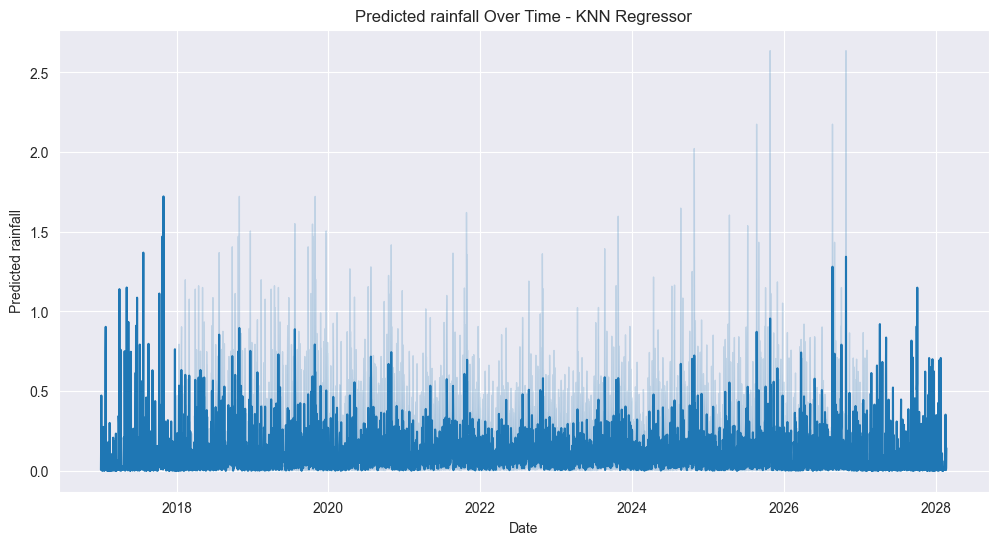

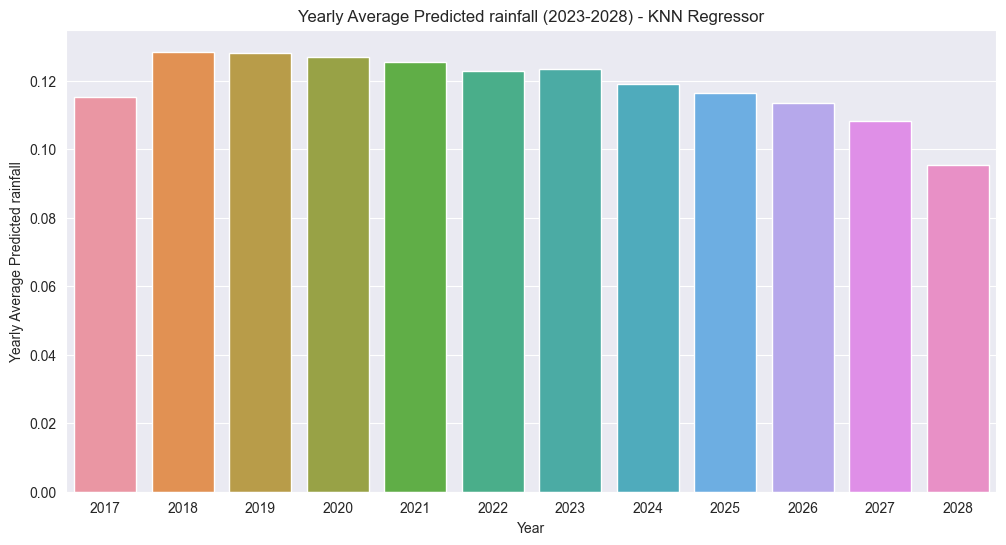

In [78]:
# Convert 'time' to pandas datetime format
df_2028['time'] = pd.to_datetime(df_2028['time'])

# Plot predicted rainfall over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='predicted_rainfall', data=df_2028)
plt.xlabel('Date')
plt.ylabel('Predicted rainfall')
plt.title('Predicted rainfall Over Time - KNN Regressor')
plt.show()

# Calculate yearly average predicted rainfall
df_2028['year'] = df_2028['time'].dt.year
yearly_avg_pred_precip = df_2028.groupby('year')['predicted_rainfall'].mean()

# Plot yearly average predicted rainfall
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_avg_pred_precip.index, y=yearly_avg_pred_precip.values)
plt.xlabel('Year')
plt.ylabel('Yearly Average Predicted rainfall')
plt.title('Yearly Average Predicted rainfall (2023-2028) - KNN Regressor')
plt.show()

## Part 5: Building a Support Vector Regressor

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVR()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.03157747597780618


In [80]:
X_new = df_2028[['max_temperature', 'min_temperature', 'mean_temperature', 'max_feels_like', 'min_feels_like', 'mean_feels_like', 'solar_radiation_sum', 'max_windspeed', 'max_windgusts']]
X_new_scaled = scaler.transform(X_new)

predicted_rainfall = svm_model.predict(X_new_scaled)
df_2028['predicted_rainfall'] = predicted_rainfall

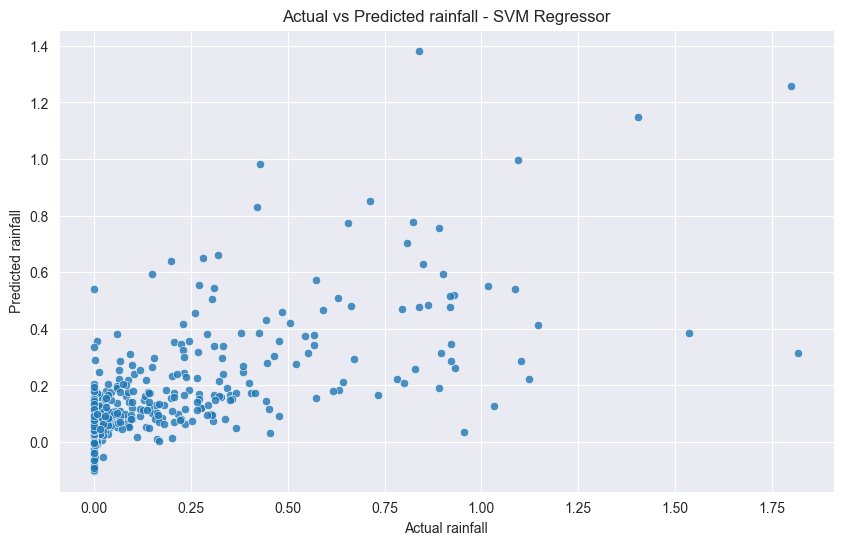

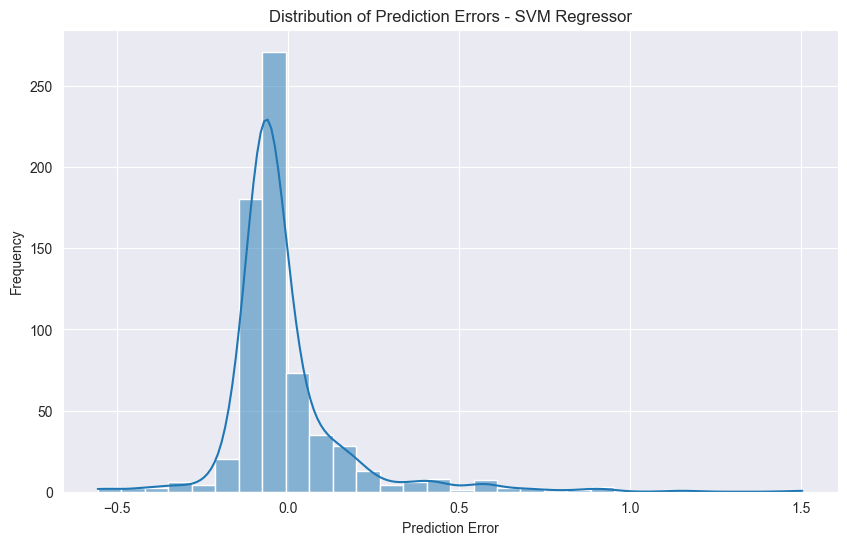

In [81]:
# Plotting the actual vs predicted rainfall using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.8)
plt.xlabel('Actual rainfall')
plt.ylabel('Predicted rainfall')
plt.title('Actual vs Predicted rainfall - SVM Regressor')
plt.show()

# Plotting the distribution of prediction errors using seaborn
error = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(error, kde=True, bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors - SVM Regressor')
plt.show()

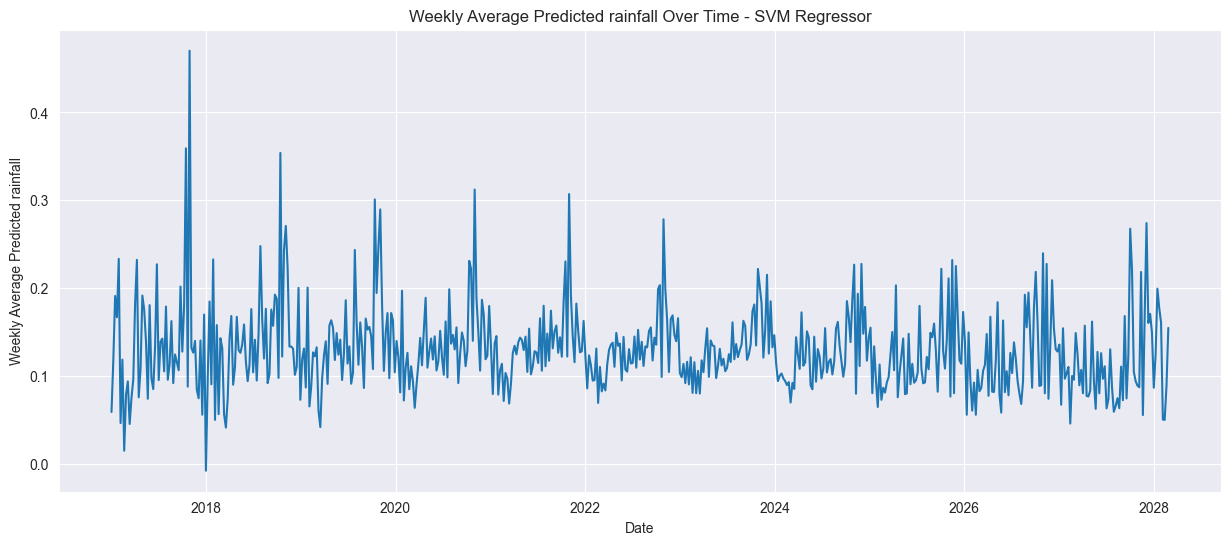

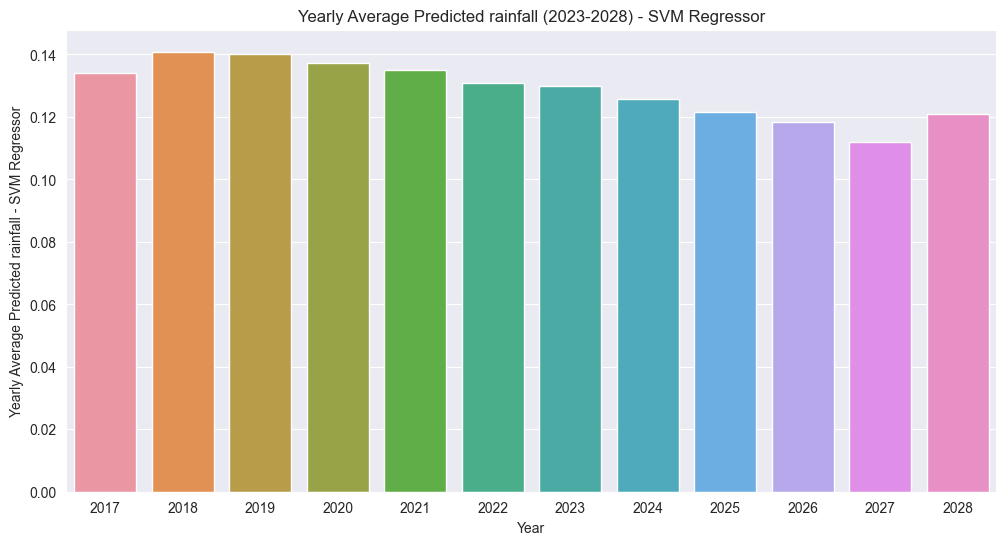

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'time' to pandas datetime format
df_2028['time'] = pd.to_datetime(df_2028['time'])
df_2028 = df_2028.set_index('time')

# Calculate the average rainfall in a week for each month
weekly_avg_precip = df_2028.resample('W')['predicted_rainfall'].mean()

# Plot weekly average predicted rainfall
plt.figure(figsize=(15, 6))
sns.lineplot(x=weekly_avg_precip.index, y=weekly_avg_precip.values)
plt.xlabel('Date')
plt.ylabel('Weekly Average Predicted rainfall')
plt.title('Weekly Average Predicted rainfall Over Time - SVM Regressor')
plt.show()

# Calculate yearly average predicted rainfall
yearly_avg_pred_precip = df_2028.resample('Y')['predicted_rainfall'].mean()

# Plot yearly average predicted rainfall
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_avg_pred_precip.index.year, y=yearly_avg_pred_precip.values)
plt.xlabel('Year')
plt.ylabel('Yearly Average Predicted rainfall - SVM Regressor')
plt.title('Yearly Average Predicted rainfall (2023-2028)')
plt.show()